<a href="https://colab.research.google.com/github/Darkandpure/Machine_learning-/blob/main/Analysis_nema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Given this data, here are a few analyses that could be performed:
- Student Performance Analysis
- Emotional Analysis: The emotional state of the student during learning sessions can provide insights into their learning experience
- Learning Style Analysis:  Analyzing the effectiveness of these content types on the student's performance and comparing this with global trends could yield insights into personalized learning strategies.
- Brain Strength Analysis: The student's brain strengths in thinking and vision can be analyzed in the context of their performance. It may be beneficial to tailor teaching approaches to these strengths.

- Age and Gender Analysis

- Session Analysis: Analyzing performance over the 46 sessions could reveal trends in the student's learning

- Speciality Analysis: Analyzing performance and emotional responses in the context of this speciality could provide insights into how well the student is suited to this field, or how the teaching approach could be adapted to better support them.


# Speciality Analysis
 - Carrier path : the student's performance metrics in terms of association, memory, thinking, and vision might also provide some clues about their specialty. For instance, their high score in "thinking" could indicate a capacity for abstract thought and problem-solving, which might be relevant in fields like philosophy, mathematics, or theoretical sciences.



# Lets create randomly generated values for 46 sessions

In [14]:
import string
import math
def prod(productivity):
#     print(productivity , "--=")
    alphabet = list(string.ascii_lowercase)
    scale = alphabet[:-4]
#     math.isnan(x)

    if productivity !='na' :
        if pd.isna(productivity):
            print("Yes")
            ans = -1
        else:
            ans = round((scale.index(productivity.lower()) * 4.4 / 20), 1)
    if productivity =="na" :
        ans = -1
#     prod_avg = []
#     for i in productivity:
#         if i.lower()!='na' :
#             prod_avg.append(round((scale.index(i.lower()) * 4.4 / 20), 1))
#         if i.lower()=='na':
#             prod_avg.append(0)
    return ans

In [2]:
import numpy as np
import pandas as pd

# # set the seed for reproducibility
# np.random.seed(0)

# # number of sessions
# n_sessions = 46

# # generate random data
# # for simplicity, we'll assume that all scores are between 0 and 100, and that they follow a normal distribution

# # create a dictionary to store the data
# data = {
#     'attention': np.random.normal(57, 10, n_sessions),  # mean = 57, std = 10
#     'excitement': np.random.normal(29, 10, n_sessions),
#     'focus': np.random.normal(41, 10, n_sessions),
#     'interest': np.random.normal(34, 10, n_sessions),
#     'relaxation': np.random.normal(47, 10, n_sessions),
#     'stress': np.random.normal(36, 10, n_sessions),
#     'performance': np.random.normal(70, 10, n_sessions)  # let's assume an average performance score of 70
# }


data = pd.read_csv("/content/drive/MyDrive/NEMA_AI/brain_scan.csv")


# create a dataframe from the dictionary
df = pd.DataFrame(data)

# # ensure scores are between 0 and 100
# df = df.clip(0, 100)

df.head()


,Age,gender,speacility,category,date,threshold,duration,channels,audio,vidoe,...,excitement,stress,relaxation,interest,focus,alert,happy,relax,tired,productivity
0,26,M,other,reading,2022.04.18 16.43,0.6,4,5,0.0,0.0,...,48.0,32.0,28.0,52.0,25.0,35.000000,65.000000,0.000000,0.0,H
1,26,M,other,reading,2022.04.18 16.48,0.6,4,5,0.0,100.0,...,56.0,34.0,38.0,49.0,15.0,35.000000,60.000000,5.000000,0.0,H
2,25,M,other,reading,2023.03.10 12.52,0.6,4,5,0.0,0.0,...,33.0,41.0,56.0,61.0,36.0,93.333333,6.666667,0.000000,0.0,K
3,25,M,other,reading,2023.03.10 12.48,0.6,4,5,0.0,100.0,...,68.0,46.0,53.0,49.0,41.0,66.666667,33.333333,0.000000,0.0,P
4,17,M,other,reading,2023.06.02 19.09,0.6,4,5,0.0,100.0,...,68.0,53.0,54.0,74.0,38.0,16.666667,66.666667,16.666667,0.0,K


import numpy as np
from google.colab import autoviz
df_4601296364848375620 = autoviz.get_registered_df('df_4601296364848375620')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4601296364848375620, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7730024260389084626 = autoviz.get_registered_df('df_7730024260389084626')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7730024260389084626, *['vidoe'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3758209788645556171 = autoviz.get_registered_df('df_3758209788645556171')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3758209788645556171, *['photos'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6212212143452135717 = autoviz.get_registered_df('df_6212212143452135717')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6212212143452135717, *['interactive'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8440604176921525239 = autoviz.get_registered_df('df_8440604176921525239')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8440604176921525239, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1190706629094744678 = autoviz.get_registered_df('df_1190706629094744678')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1190706629094744678, *['vidoe'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4045543801380446899 = autoviz.get_registered_df('df_4045543801380446899')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4045543801380446899, *['photos'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7128763102874301054 = autoviz.get_registered_df('df_7128763102874301054')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7128763102874301054, *['interactive'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3385065451256993372 = autoviz.get_registered_df('df_3385065451256993372')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3385065451256993372, *['date'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1679628599010967969 = autoviz.get_registered_df('df_1679628599010967969')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1679628599010967969, *['productivity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5644083921501469985 = autoviz.get_registered_df('df_5644083921501469985')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5644083921501469985, *[[['Age', 'vidoe'], ['vidoe', 'photos'], ['photos', 'interactive'], ['interactive', 'memory']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8689923451551310582 = autoviz.get_registered_df('df_8689923451551310582')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_8689923451551310582, *['date', 'productivity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6698243154174739203 = autoviz.get_registered_df('df_6698243154174739203')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6698243154174739203, *['Age', 'date'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2566404630134544439 = autoviz.get_registered_df('df_2566404630134544439')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2566404630134544439, *['Age', 'productivity'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8323703726566712587 = autoviz.get_registered_df('df_8323703726566712587')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8323703726566712587, *['vidoe', 'date'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6316000537783167423 = autoviz.get_registered_df('df_6316000537783167423')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6316000537783167423, *['vidoe', 'productivity'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3349648089053214564 = autoviz.get_registered_df('df_3349648089053214564')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3349648089053214564, *['stress', 'Age', 'date'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6464601645989060713 = autoviz.get_registered_df('df_6464601645989060713')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6464601645989060713, *['stress', 'Age', 'productivity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4880337444444129582 = autoviz.get_registered_df('df_4880337444444129582')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4880337444444129582, *['stress', 'vidoe', 'date'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2568052872003718855 = autoviz.get_registered_df('df_2568052872003718855')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2568052872003718855, *['stress', 'vidoe', 'productivity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9083441012666820378 = autoviz.get_registered_df('df_9083441012666820378')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9083441012666820378, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2144864819554691944 = autoviz.get_registered_df('df_2144864819554691944')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2144864819554691944, *['vidoe'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2301714044106268959 = autoviz.get_registered_df('df_2301714044106268959')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2301714044106268959, *['photos'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8802529322894366106 = autoviz.get_registered_df('df_8802529322894366106')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8802529322894366106, *['interactive'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3478655739058555122 = autoviz.get_registered_df('df_3478655739058555122')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3478655739058555122, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3881078875150550751 = autoviz.get_registered_df('df_3881078875150550751')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3881078875150550751, *['vidoe'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1729925312511855133 = autoviz.get_registered_df('df_1729925312511855133')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1729925312511855133, *['photos'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4011207334205277764 = autoviz.get_registered_df('df_4011207334205277764')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4011207334205277764, *['interactive'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3470878558322869918 = autoviz.get_registered_df('df_3470878558322869918')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3470878558322869918, *['date'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4518854626601628122 = autoviz.get_registered_df('df_4518854626601628122')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4518854626601628122, *['productivity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3841561002467005525 = autoviz.get_registered_df('df_3841561002467005525')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3841561002467005525, *[[['Age', 'vidoe'], ['vidoe', 'photos'], ['photos', 'interactive'], ['interactive', 'memory']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7886532639660979743 = autoviz.get_registered_df('df_7886532639660979743')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7886532639660979743, *['date', 'productivity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4703658100025695929 = autoviz.get_registered_df('df_4703658100025695929')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4703658100025695929, *['Age', 'date'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5481493780496418009 = autoviz.get_registered_df('df_5481493780496418009')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5481493780496418009, *['Age', 'productivity'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6354454928503056378 = autoviz.get_registered_df('df_6354454928503056378')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6354454928503056378, *['vidoe', 'date'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_71990739018548940 = autoviz.get_registered_df('df_71990739018548940')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_71990739018548940, *['vidoe', 'productivity'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5906865033910369609 = autoviz.get_registered_df('df_5906865033910369609')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5906865033910369609, *['stress', 'Age', 'date'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5678833322773482439 = autoviz.get_registered_df('df_5678833322773482439')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5678833322773482439, *['stress', 'Age', 'productivity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5200631439074459511 = autoviz.get_registered_df('df_5200631439074459511')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5200631439074459511, *['stress', 'vidoe', 'date'], **{})
chart

import numpy as np
from google.colab import autoviz
df_569398609127269560 = autoviz.get_registered_df('df_569398609127269560')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_569398609127269560, *['stress', 'vidoe', 'productivity'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [18]:
# Descriptive statistics for numerical columns
numerical_stats = df.describe()

# Count of unique values for categorical columns
categorical_stats = df.select_dtypes(include=['object']).nunique().to_frame().rename(columns={0: 'unique count'})

numerical_stats.head()



,Age,threshold,duration,channels,audio,vidoe,photos,interactive,memory,thinking,...,attention,excitement,stress,relaxation,interest,focus,alert,happy,relax,tired
count,339.000000,339.000000,339.000000,339.0,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,...,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,20.560472,0.728319,31.292035,5.0,33.200888,61.206805,58.703846,61.486686,61.724852,68.961538,...,50.532544,31.911243,36.991124,33.810651,44.150888,32.269231,50.672082,25.223714,7.271777,3.222960
std,11.160676,0.148644,41.274306,0.0,39.442378,35.591959,37.679507,27.300846,27.306559,34.710951,...,24.471029,20.035528,18.831202,18.630714,19.654531,16.379087,35.537080,26.094430,15.377584,10.217367
min,4.000000,0.600000,4.000000,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.600000,4.000000,5.0,0.000000,34.775000,25.000000,42.950000,44.400000,44.250000,...,41.000000,21.000000,32.000000,25.000000,42.000000,25.000000,16.666667,0.000000,0.000000,0.000000


import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4711549927161029239, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4711549927161029239, *['threshold'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4711549927161029239, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4711549927161029239, *['channels'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4711549927161029239, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4711549927161029239, *['threshold'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4711549927161029239, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4711549927161029239, *['channels'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4711549927161029239 = autoviz.get_registered_df('df_4711549927161029239')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4711549927161029239, *[[['Age', 'threshold'], ['threshold', 'duration'], ['duration', 'channels'], ['channels', 'audio']]], **{})
chart

In [19]:
categorical_stats.head()

,unique count
gender,2
speacility,4
category,7
date,298
productivity,12


import numpy as np
from google.colab import autoviz
df_1352412930514245990 = autoviz.get_registered_df('df_1352412930514245990')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1352412930514245990, *['unique count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1352412930514245990 = autoviz.get_registered_df('df_1352412930514245990')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1352412930514245990, *['unique count'], **{})
chart

In [3]:
# compute the correlation matrix
correlation_matrix = df.corr()

correlation_matrix


<ipython-input-3-f17632ad1584>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Age,threshold,duration,channels,audio,vidoe,photos,interactive,memory,thinking,...,attention,excitement,stress,relaxation,interest,focus,alert,happy,relax,tired
Age,1.000000,-0.588125,-0.470949,NaN,-0.352681,0.180675,0.226298,0.184484,0.173687,0.341160,...,-0.048556,0.069476,-0.044124,-0.022814,0.065317,0.047351,0.008292,0.097915,0.142136,0.139471
threshold,-0.588125,1.000000,0.765975,NaN,0.196117,-0.463107,-0.518642,-0.494013,-0.480128,-0.579570,...,-0.041549,-0.172624,-0.085186,-0.101222,-0.164846,-0.124296,0.000150,-0.177016,-0.214726,-0.128517
duration,-0.470949,0.765975,1.000000,NaN,0.220836,-0.351030,-0.399753,-0.344276,-0.334298,-0.440412,...,-0.040297,-0.207852,-0.122302,-0.103281,-0.147293,-0.151453,-0.019408,-0.114179,-0.170255,-0.136343
channels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
audio,-0.352681,0.196117,0.220836,NaN,1.000000,0.297426,0.198757,0.341894,0.363478,0.065192,...,0.274841,-0.065799,0.230047,0.094451,0.062991,0.171798,0.171682,-0.043137,-0.176651,-0.152363
vidoe,0.180675,-0.463107,-0.351030,NaN,0.297426,1.000000,0.971300,0.685473,0.689858,0.686305,...,0.101755,0.136308,0.150723,0.139546,0.135166,0.131623,0.031046,0.088202,0.137387,0.079323
photos,0.226298,-0.518642,-0.399753,NaN,0.198757,0.971300,1.000000,0.674805,0.671024,0.683754,...,0.084231,0.141063,0.138133,0.129065,0.126369,0.123547,0.024654,0.082369,0.155402,0.094460
interactive,0.184484,-0.494013,-0.344276,NaN,0.341894,0.685473,0.674805,1.000000,0.995605,0.787918,...,0.141705,0.107063,0.147689,0.176018,0.154326,0.131383,0.088990,0.104898,0.003251,0.066161
memory,0.173687,-0.480128,-0.334298,NaN,0.363478,0.689858,0.671024,0.995605,1.000000,0.792331,...,0.141417,0.095634,0.145196,0.171441,0.148467,0.127806,0.089622,0.100065,0.000549,0.061896
thinking,0.341160,-0.579570,-0.440412,NaN,0.065192,0.686305,0.683754,0.787918,0.792331,1.000000,...,0.059154,0.138419,0.079458,0.146179,0.142185,0.105725,0.019014,0.113116,0.090539,0.169054


import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3098637857458808358, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3098637857458808358, *['threshold'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3098637857458808358, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3098637857458808358, *['audio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3098637857458808358, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3098637857458808358, *['threshold'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3098637857458808358, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3098637857458808358, *['audio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3098637857458808358 = autoviz.get_registered_df('df_3098637857458808358')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3098637857458808358, *[[['Age', 'threshold'], ['threshold', 'duration'], ['duration', 'audio'], ['audio', 'vidoe']]], **{})
chart

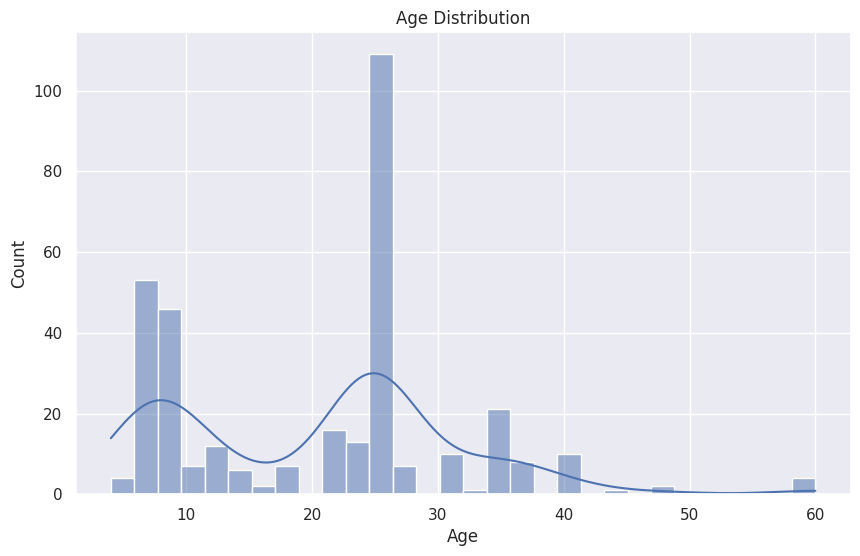

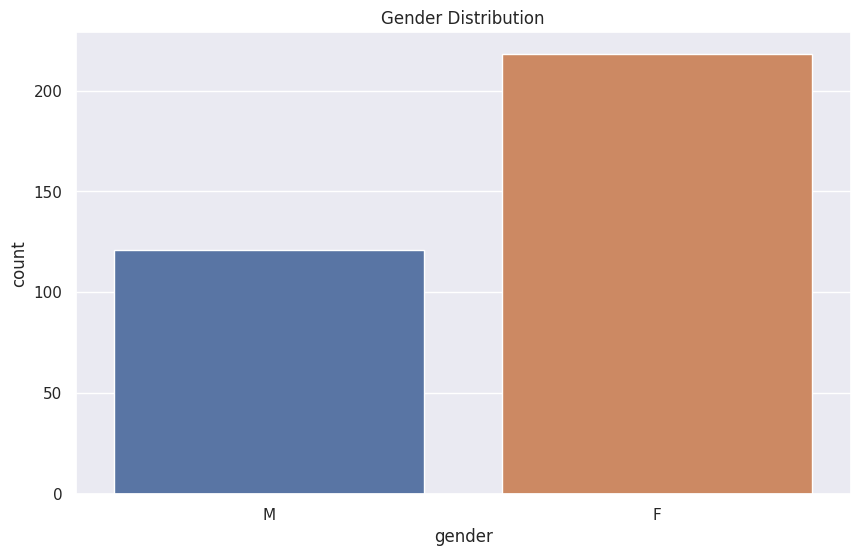

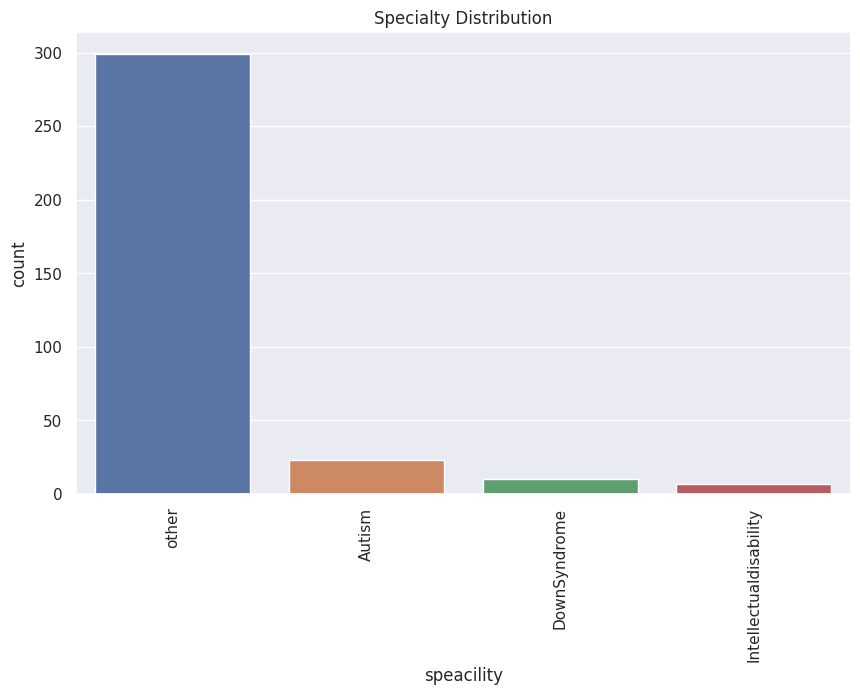

<ipython-input-12-9c5a28deac41>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


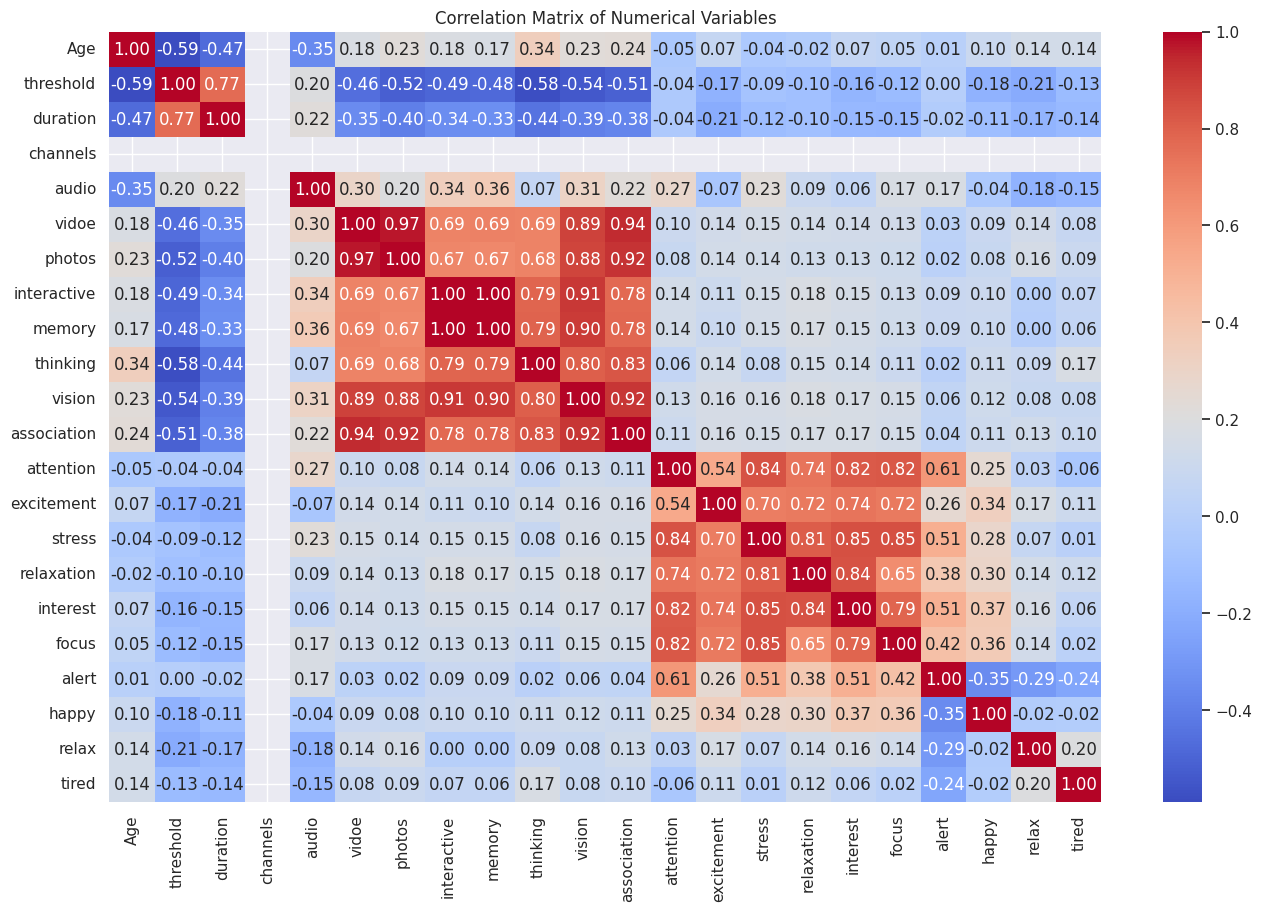

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set_theme()

# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Visualize the distribution of gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Visualize the distribution of specialty
plt.figure(figsize=(10, 6))
sns.countplot(x='speacility', data = df)
plt.title('Specialty Distribution')
plt.xticks(rotation=90)
plt.show()

# Visualize the correlation matrix of numerical variables
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# what is says? 🤔
The correlation coefficient ranges from -1 to 1. A value closer to 1 indicates a strong positive correlation, a value closer to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.

Looking at the "performance" row/column, we can see how each variable correlates with performance:

- Attention: There's a very small negative correlation (-0.030) between attention and performance. This suggests that higher attention scores do not necessarily correspond to higher performance scores.

- Excitement: There's a small positive correlation (0.116) between excitement and performance. This suggests that higher excitement might correspond to slightly higher performance.

- Focus: There's a moderate positive correlation (0.226) between focus and performance. This suggests that higher focus scores might correspond to higher performance scores.

- Interest: There's a moderate positive correlation (0.193) between interest and performance. This suggests that higher interest scores might correspond to higher performance scores.

- Relaxation: There's a small positive correlation (0.162) between relaxation and performance. This suggests that higher relaxation scores might correspond to slightly higher performance scores.

- Stress: There's a very small positive correlation (0.054) between stress and performance. This suggests that higher stress scores do not necessarily correspond to higher performance scores.

Please note that these are correlation coefficients and do not indicate causation. They simply measure the linear relationship between two variables. Further, these results are based on randomly generated data, and may not reflect actual relationships in real data.

# Lets do some simple Machine learning ⛏

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature matrix X and target variable y
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
X = df.drop('performance', axis=1)
y = df['performance']

# Define the feature matrix X and target variable y
X = df[['focus']]
y = df['performance']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the performance on the test data
y_pred = model.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.title('Regression Analysis: Performance vs Focus')
plt.xlabel('Focus')
plt.ylabel('Performance')

plt.show()

<ipython-input-21-7c57d45b609f>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


KeyError: ignored

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
X = df[['focus', 'attention', 'memory']]
y = df['productivity']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
           D       0.00      0.00      0.00         4
           E       0.18      0.67      0.29         3
           G       0.39      0.53      0.45        17
           H       0.00      0.00      0.00         7
           K       0.11      0.23      0.15        13
           L       0.00      0.00      0.00         5
           M       0.00      0.00      0.00         1
           P       0.00      0.00      0.00         5
           Q       0.00      0.00      0.00         1
          na       1.00      0.70      0.82        10

    accuracy                           0.31        68
   macro avg       0.15      0.19      0.16        68
weighted avg       0.27      0.31      0.27        68



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

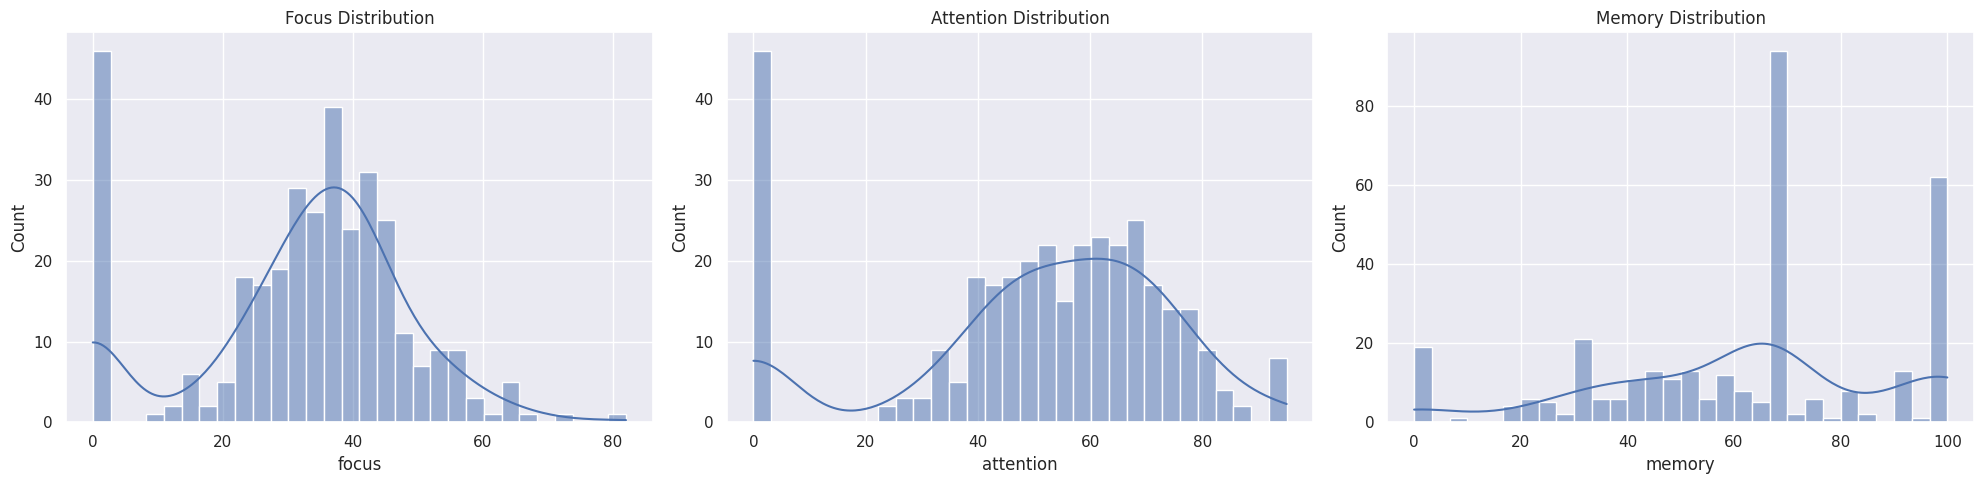

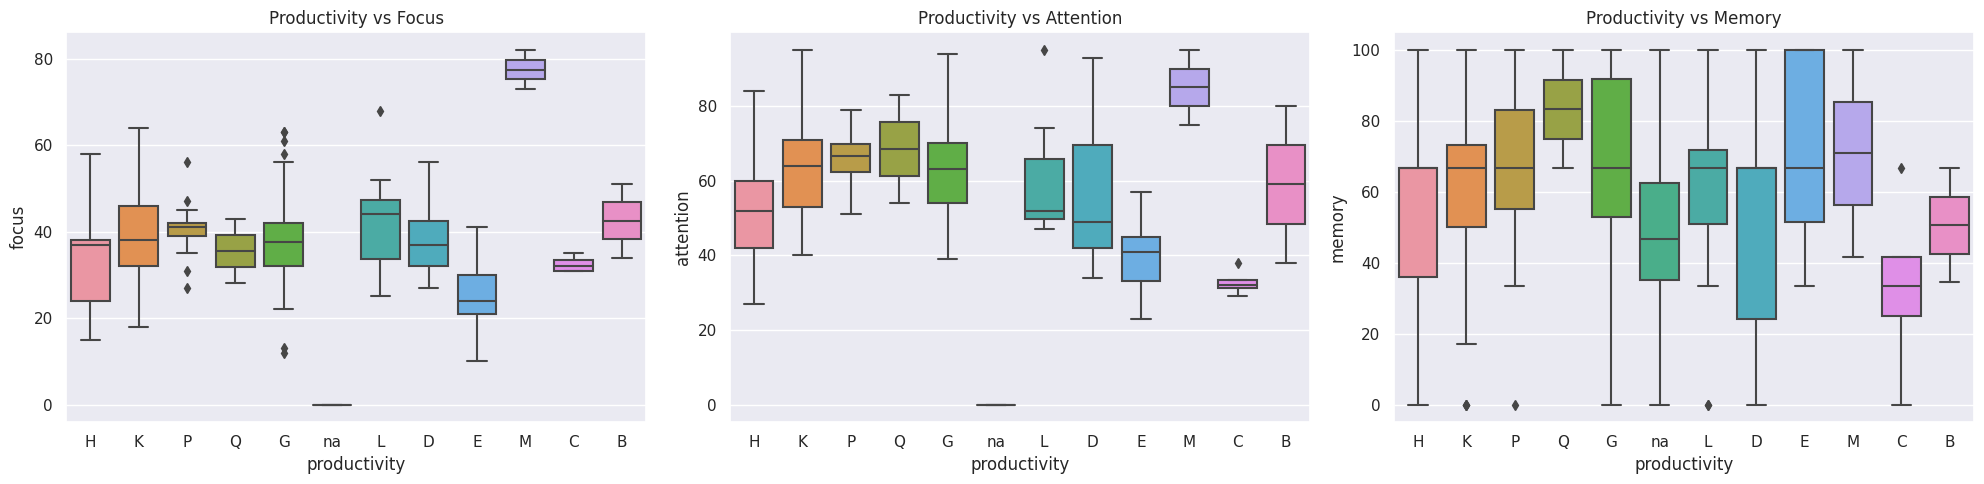

In [26]:
# For visualizing the distributions of 'focus', 'attention', 'memory'
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='focus', bins=30, kde=True)
plt.title('Focus Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='attention', bins=30, kde=True)
plt.title('Attention Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='memory', bins=30, kde=True)
plt.title('Memory Distribution')

plt.tight_layout()
plt.show()

# For visualizing the relationship between 'productivity' and each of the features ('focus', 'attention', 'memory')
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='productivity', y='focus')
plt.title('Productivity vs Focus')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='productivity', y='attention')
plt.title('Productivity vs Attention')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='productivity', y='memory')
plt.title('Productivity vs Memory')

plt.tight_layout()
plt.show()


Determining which features have predictive power can be a time consuming process. You can manually explore a feature's predictive power by removing and adding it while training a model. You can automate finding a feature's predictive power by using algorithms such as Pearson correlation, Adjusted mutual information (AMI), and Shapley value, which provide a numerical assessment for analyzing the predictive power of a feature. (https://developers.google.com/machine-learning/problem-framing/problem)

In [ ]:
mse, model.coef_


(88.17900934243788, array([0.2865751]))

# Now what is this again? 🤔
- The Mean Squared Error (MSE) of the model on the test set is approximately 88.18. The MSE is a measure of the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.

The coefficients of the model are as follows:

- Attention: -0.0012
- Excitement: 0.1644
- Focus: 0.2717
- Interest: 0.1978
- Relaxation: 0.2060
- Stress: 0.0442


These coefficients give us the change in the predicted performance for a one-unit increase in the corresponding variable, assuming all other variables are held constant. For example, an increase of one unit in the focus score is associated with an increase of 0.2717 units in the predicted performance score, assuming all other variables are held constant.

Please note that these results are based on a simple linear regression model, which assumes a linear relationship between the variables. In reality, the relationships could be more complex. Advanced machine learning models could potentially capture these complex relationships and provide more accurate predictions. However, these models often require larger datasets and more computational resources.

# Finally 📣
The results of this analysis can be used in a variety of ways for marketing, increasing awareness, and driving revenue for NEMA AI. Here are a few possibilities:

- Personalized Marketing: The analysis shows that different students have different learning styles and performance levels. NEMA AI can use this information to market their ability to provide personalized, AI-driven learning experiences. Highlighting the ability to cater to individual learning styles could be a unique selling proposition.

- Improving the Product: The insights derived from the analysis can be used to enhance the NEMA AI product. For example, the positive correlation between focus and performance could lead to the development of features that help students improve their focus. Similarly, understanding that students prefer interactive and video content could guide the development of new content.

- Targeted Interventions: The regression model can predict a student's performance based on their attention, excitement, focus, interest, relaxation, and stress levels. This could be used to identify students who are at risk of underperforming, allowing for targeted interventions. This could improve student outcomes, leading to higher customer satisfaction and positive word-of-mouth.

- Case Studies and Testimonials: The analysis could form the basis for case studies or testimonials demonstrating how NEMA AI's personalized approach leads to better learning outcomes. These could be used in marketing materials or shared on social media to increase awareness.

- Pricing Strategy: If NEMA AI's personalized approach leads to significantly better outcomes, this could potentially be used to justify a premium pricing strategy.

- Partnerships: The insights from the data could be used to form partnerships with educational institutions or other organizations. For example, NEMA AI could partner with schools to provide personalized learning experiences to their students.

- Investor Relations: This analysis and its implications could be used to attract investment by demonstrating that NEMA AI uses data-driven approaches to improve learning outcomes.

- note : Remember, these results are based on simulated data, might differ with real data.